In [1]:
import scanpy as sc
import anndata as ad


In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [3]:
DATA_PATH = '/projectnb/czproj/Algorithms/ycliu/scDiffusion/data/BMMC/'

OUTPUT_PATH = '/projectnb/czlab/A00/ycliu/scRNA_integration_benchmark_datasets/BMMC_rm100pct/'


# Load data

In [4]:
adata_all = sc.read_h5ad(DATA_PATH + 'GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad')

/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
adata_all

AnnData object with n_obs × n_vars = 90261 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [6]:
adata_all.obs['batch']

GCATTAGCATAAGCGG-1-s1d1    s1d1
TACAGGTGTTAGAGTA-1-s1d1    s1d1
AGGATCTAGGTCTACT-1-s1d1    s1d1
GTAGAAAGTGACACAG-1-s1d1    s1d1
TCCGAAAAGGATCATA-1-s1d1    s1d1
                           ... 
GAATCACCACGGAAGT-1-s4d9    s4d9
GCTGGGTGTACGGATG-1-s4d9    s4d9
TCGAAGTGTGACAGGT-1-s4d9    s4d9
GCAGGCTGTTGCATAC-1-s4d9    s4d9
ACGTAACAGGTCTACT-1-s4d9    s4d9
Name: batch, Length: 90261, dtype: category
Categories (12, object): ['s1d1', 's1d2', 's1d3', 's2d1', ..., 's3d7', 's4d1', 's4d8', 's4d9']

In [7]:
adata_all.obs['DonorID'] = adata_all.obs['DonorID'].astype('category')
adata_all.obs['DonorID']

GCATTAGCATAAGCGG-1-s1d1    15078
TACAGGTGTTAGAGTA-1-s1d1    15078
AGGATCTAGGTCTACT-1-s1d1    15078
GTAGAAAGTGACACAG-1-s1d1    15078
TCCGAAAAGGATCATA-1-s1d1    15078
                           ...  
GAATCACCACGGAAGT-1-s4d9    13272
GCTGGGTGTACGGATG-1-s4d9    13272
TCGAAGTGTGACAGGT-1-s4d9    13272
GCAGGCTGTTGCATAC-1-s4d9    13272
ACGTAACAGGTCTACT-1-s4d9    13272
Name: DonorID, Length: 90261, dtype: category
Categories (9, int64): [10886, 11466, 12710, 13272, ..., 16710, 18303, 19593, 28045]

In [8]:
import numpy as np

unique_elements, counts = np.unique(adata_all.obs['batch'], return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}:  {count}")

s1d1:  5227
s1d2:  4978
s1d3:  6106
s2d1:  10465
s2d4:  5584
s2d5:  9122
s3d1:  9521
s3d6:  11035
s3d7:  11473
s4d1:  5456
s4d8:  3929
s4d9:  7365


In [9]:
import numpy as np

unique_elements, counts = np.unique(adata_all.obs['DonorID'], return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}:  {count}")

10886:  4978
11466:  11473
12710:  5584
13272:  7365
15078:  30669
16710:  9122
18303:  6106
19593:  3929
28045:  11035


In [10]:
adata = adata_all[adata_all.obs['DonorID']==15078]
adata

View of AnnData object with n_obs × n_vars = 30669 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [11]:
import numpy as np

unique_elements, counts = np.unique(adata.obs['batch'], return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}:  {count}")

s1d1:  5227
s2d1:  10465
s3d1:  9521
s4d1:  5456


In [12]:
adata.obs['labels'] = adata.obs['cell_type']
adata.obs['labels']

/scratch/7328370.1.iris-gpu-pub/ipykernel_974751/657453586.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['labels'] = adata.obs['cell_type']
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GCATTAGCATAAGCGG-1-s1d1    Naive CD20+ B IGKC+
TACAGGTGTTAGAGTA-1-s1d1             CD14+ Mono
AGGATCTAGGTCTACT-1-s1d1    Naive CD20+ B IGKC+
GTAGAAAGTGACACAG-1-s1d1                    HSC
TCCGAAAAGGATCATA-1-s1d1           Reticulocyte
                                  ...         
TAGATCGTCTCTATAC-1-s4d1                     NK
AAGACTCAGGGCAAGG-1-s4d1            NK CD158e1+
CGAGAAGCACCTCGTT-1-s4d1      Plasma cell IGKC+
TATCCTAGTTCTCCTG-1-s4d1    Naive CD20+ B IGKC-
TGCCGAGCAACAAAGT-1-s4d1       CD4+ T activated
Name: labels, Length: 30669, dtype: category
Categories (40, object): ['B1 B IGKC+', 'B1 B IGKC-', 'CD4+ T activated', 'CD4+ T activated integrinB7+', ..., 'cDC2', 'gdT CD158b+', 'gdT TCRVD2+', 'pDC']

# Export dataset

In [13]:
adata

AnnData object with n_obs × n_vars = 30669 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'labels'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [14]:
columns_to_remove = ['GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 
                     'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 
                     'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 
                     'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 
                     'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train',]
adata.obs.drop(columns_to_remove, axis=1, inplace=True)
adata

AnnData object with n_obs × n_vars = 30669 × 14087
    obs: 'batch', 'labels'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [15]:
adata.var

,feature_types,gene_id
AL627309.5,GEX,ENSG00000241860
LINC01409,GEX,ENSG00000237491
LINC01128,GEX,ENSG00000228794
LINC00115,GEX,ENSG00000225880
FAM41C,GEX,ENSG00000230368
...,...,...
HLA-E,ADT,ENSG00000204592
CD82,ADT,ENSG00000085117
CD101,ADT,ENSG00000134256
CD88,ADT,NaN


In [16]:
adata.var = adata.var.rename(columns={'feature_types': 'feature_types_1'})
adata.var['gene_symbols'] = adata.var.index
adata.var['feature_types'] = adata.var['feature_types_1']
adata.var.drop(['feature_types_1'], axis=1, inplace=True)

adata

AnnData object with n_obs × n_vars = 30669 × 14087
    obs: 'batch', 'labels'
    var: 'gene_id', 'gene_symbols', 'feature_types'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [17]:
adata.var['feature_types'] = 'Gene Expression'

In [18]:
keys_to_remove = ['dataset_id', 'genome', 'organism']  # Make a list of all keys in obsm
for key in keys_to_remove:
    adata.uns.pop(key)

adata

AnnData object with n_obs × n_vars = 30669 × 14087
    obs: 'batch', 'labels'
    var: 'gene_id', 'gene_symbols', 'feature_types'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [19]:
keys_to_remove = ['ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap']  # Make a list of all keys in obsm
for key in keys_to_remove:
    adata.obsm.pop(key)

adata

AnnData object with n_obs × n_vars = 30669 × 14087
    obs: 'batch', 'labels'
    var: 'gene_id', 'gene_symbols', 'feature_types'
    layers: 'counts'

In [20]:
adata.layers.pop('counts')
adata

AnnData object with n_obs × n_vars = 30669 × 14087
    obs: 'batch', 'labels'
    var: 'gene_id', 'gene_symbols', 'feature_types'

In [21]:
adata.var

,gene_id,gene_symbols,feature_types
AL627309.5,ENSG00000241860,AL627309.5,Gene Expression
LINC01409,ENSG00000237491,LINC01409,Gene Expression
LINC01128,ENSG00000228794,LINC01128,Gene Expression
LINC00115,ENSG00000225880,LINC00115,Gene Expression
FAM41C,ENSG00000230368,FAM41C,Gene Expression
...,...,...,...
HLA-E,ENSG00000204592,HLA-E,Gene Expression
CD82,ENSG00000085117,CD82,Gene Expression
CD101,ENSG00000134256,CD101,Gene Expression
CD88,NaN,CD88,Gene Expression


In [22]:
adata.X

<30669x14087 sparse matrix of type '<class 'numpy.float32'>'
	with 41524474 stored elements in Compressed Sparse Row format>

In [23]:
import numpy as np

unique_elements, counts = np.unique(adata.obs['batch'], return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}:  {count}")

s1d1:  5227
s2d1:  10465
s3d1:  9521
s4d1:  5456


In [24]:
adata.var.index = adata.var.index + adata.var.groupby(adata.var.index).cumcount().astype(str)

In [25]:
adata.var

,gene_id,gene_symbols,feature_types
AL627309.50,ENSG00000241860,AL627309.5,Gene Expression
LINC014090,ENSG00000237491,LINC01409,Gene Expression
LINC011280,ENSG00000228794,LINC01128,Gene Expression
LINC001150,ENSG00000225880,LINC00115,Gene Expression
FAM41C0,ENSG00000230368,FAM41C,Gene Expression
...,...,...,...
HLA-E1,ENSG00000204592,HLA-E,Gene Expression
CD821,ENSG00000085117,CD82,Gene Expression
CD1011,ENSG00000134256,CD101,Gene Expression
CD880,NaN,CD88,Gene Expression


# Remove cells

In [26]:
adata_0 = adata[adata.obs['batch'].isin(['s1d1', 's2d1'])]
adata_0

View of AnnData object with n_obs × n_vars = 15692 × 14087
    obs: 'batch', 'labels'
    var: 'gene_id', 'gene_symbols', 'feature_types'

In [27]:
adata_1 = adata[adata.obs['batch'].isin(['s3d1', 's4d1'])]
adata_1

View of AnnData object with n_obs × n_vars = 14977 × 14087
    obs: 'batch', 'labels'
    var: 'gene_id', 'gene_symbols', 'feature_types'

In [28]:
adata_0a = adata_0[~(adata_0.obs['labels']=='CD4+ T activated')]
adata_0b = adata_0[adata_0.obs['labels']=='CD4+ T activated']

In [29]:
adata_1a = adata_1[~(adata_1.obs['labels']=='Erythroblast')]
adata_1b = adata_1[adata_1.obs['labels']=='Erythroblast']

In [59]:
import numpy as np

def remove_cells_by_pct(adata, remove_pct=0.25):

    n_remove = int(remove_pct * adata.X.shape[0])

    indices_to_remove = np.random.choice(adata.X.shape[0], n_remove, replace=False)

    mask = np.ones(adata.X.shape[0], dtype=bool)
    mask[indices_to_remove] = False

    adata_removed = adata[mask]
    
    return adata_removed

In [93]:

remove_pct = 0.75

adata_0bb = remove_cells_by_pct(adata_0b, remove_pct=remove_pct)
adata_1bb = remove_cells_by_pct(adata_1b, remove_pct=remove_pct)

In [36]:
adata = ad.concat([adata_0a, adata_0bb, adata_1a, adata_1bb], merge='same')
adata

NameError: name 'adata_0bb' is not defined

In [30]:
adata = ad.concat([adata_0a, adata_1a], merge='same')
adata

AnnData object with n_obs × n_vars = 28826 × 14087
    obs: 'batch', 'labels'
    var: 'gene_id', 'gene_symbols', 'feature_types'

In [37]:
# adata = ad.concat([adata_0a, adata_0b, adata_1a, adata_1b], merge='same')
# adata

AnnData object with n_obs × n_vars = 30669 × 14087
    obs: 'batch', 'labels'
    var: 'gene_id', 'gene_symbols', 'feature_types'

## Save anndata

In [110]:
adata.write(OUTPUT_PATH+'bmmc_rm100pct.h5ad')

## Save 10X data

In [111]:
import scipy.io
from scipy.sparse import csr_matrix
import numpy as np
import gzip

def save_10X_data(path, data, X_sparse=False):
    """
    args:   path, data. data included three numpy array valued components (counts_matrix, genes, cells).
    """
    counts_matrix, genes, cells = data # 
    
    # compress counts_matrix
    if X_sparse:
        counts_matrix = counts_matrix.T
    else:
        counts_matrix = csr_matrix(counts_matrix).T
    
    with gzip.open(path+'matrix.mtx.gz', 'wb') as f:
        scipy.io.mmwrite(f, counts_matrix)
        
    with gzip.open(path+'features.tsv.gz', 'wt') as f:
        np.savetxt(f, genes, delimiter='\t', fmt='%s')
        
    with gzip.open(path+'barcodes.tsv.gz', 'wt') as f:
        np.savetxt(f, cells, delimiter='\t', fmt='%s')

In [112]:
import numpy as np
counts_matrix = adata.X
genes = np.array(adata.var)
cells = np.array(adata.obs.index)
labels =  np.array(adata.obs['labels'])
batch = np.array(adata.obs['batch'])

In [113]:
data = counts_matrix, genes, cells
save_10X_data(OUTPUT_PATH, data, X_sparse=True)

In [114]:
np.savetxt(OUTPUT_PATH+'labels.csv', labels, delimiter='\t', fmt='%s')
np.savetxt(OUTPUT_PATH+'batch.csv', batch, delimiter='\t', fmt='%s')

## Check 10X data

In [115]:
adata_10X = sc.read_10x_mtx(OUTPUT_PATH)
adata_10X

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 28826 × 14087
    var: 'gene_ids', 'feature_types'

In [116]:
import pandas as pd
import numpy as np

df = pd.read_csv(OUTPUT_PATH+'batch.csv', sep='\t', header=None)

adata_10X.obs['batch'] = np.array(df)[:,0]
adata_10X.obs['batch'] = adata_10X.obs['batch'].astype('category')


df = pd.read_csv(OUTPUT_PATH+'labels.csv', sep='\t', header=None)
df
adata_10X.obs['labels'] = np.array(df)[:,0]
adata_10X.obs['labels'] = adata_10X.obs['labels'].astype('category')


In [117]:
adata_10X.var

,gene_ids,feature_types
AL627309.5,ENSG00000241860,Gene Expression
LINC01409,ENSG00000237491,Gene Expression
LINC01128,ENSG00000228794,Gene Expression
LINC00115,ENSG00000225880,Gene Expression
FAM41C,ENSG00000230368,Gene Expression
...,...,...
HLA-E-1,ENSG00000204592,Gene Expression
CD82-1,ENSG00000085117,Gene Expression
CD101-1,ENSG00000134256,Gene Expression
CD88,NaN,Gene Expression


In [118]:
adata_10X.obs

,batch,labels
GCATTAGCATAAGCGG-1-s1d1,s1d1,Naive CD20+ B IGKC+
TACAGGTGTTAGAGTA-1-s1d1,s1d1,CD14+ Mono
AGGATCTAGGTCTACT-1-s1d1,s1d1,Naive CD20+ B IGKC+
GTAGAAAGTGACACAG-1-s1d1,s1d1,HSC
TCCGAAAAGGATCATA-1-s1d1,s1d1,Reticulocyte
...,...,...
TAGATCGTCTCTATAC-1-s4d1,s4d1,NK
AAGACTCAGGGCAAGG-1-s4d1,s4d1,NK CD158e1+
CGAGAAGCACCTCGTT-1-s4d1,s4d1,Plasma cell IGKC+
TATCCTAGTTCTCCTG-1-s4d1,s4d1,Naive CD20+ B IGKC-


## Check anndata

In [119]:
adata = sc.read_h5ad(OUTPUT_PATH+ 'bmmc_rm100pct.h5ad')
adata

AnnData object with n_obs × n_vars = 28826 × 14087
    obs: 'batch', 'labels'
    var: 'gene_id', 'gene_symbols', 'feature_types'

In [120]:
adata.var

,gene_id,gene_symbols,feature_types
AL627309.50,ENSG00000241860,AL627309.5,Gene Expression
LINC014090,ENSG00000237491,LINC01409,Gene Expression
LINC011280,ENSG00000228794,LINC01128,Gene Expression
LINC001150,ENSG00000225880,LINC00115,Gene Expression
FAM41C0,ENSG00000230368,FAM41C,Gene Expression
...,...,...,...
HLA-E1,ENSG00000204592,HLA-E,Gene Expression
CD821,ENSG00000085117,CD82,Gene Expression
CD1011,ENSG00000134256,CD101,Gene Expression
CD880,NaN,CD88,Gene Expression


In [121]:
adata.obs

,batch,labels
GCATTAGCATAAGCGG-1-s1d1,s1d1,Naive CD20+ B IGKC+
TACAGGTGTTAGAGTA-1-s1d1,s1d1,CD14+ Mono
AGGATCTAGGTCTACT-1-s1d1,s1d1,Naive CD20+ B IGKC+
GTAGAAAGTGACACAG-1-s1d1,s1d1,HSC
TCCGAAAAGGATCATA-1-s1d1,s1d1,Reticulocyte
...,...,...
TAGATCGTCTCTATAC-1-s4d1,s4d1,NK
AAGACTCAGGGCAAGG-1-s4d1,s4d1,NK CD158e1+
CGAGAAGCACCTCGTT-1-s4d1,s4d1,Plasma cell IGKC+
TATCCTAGTTCTCCTG-1-s4d1,s4d1,Naive CD20+ B IGKC-


# Preprocess

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


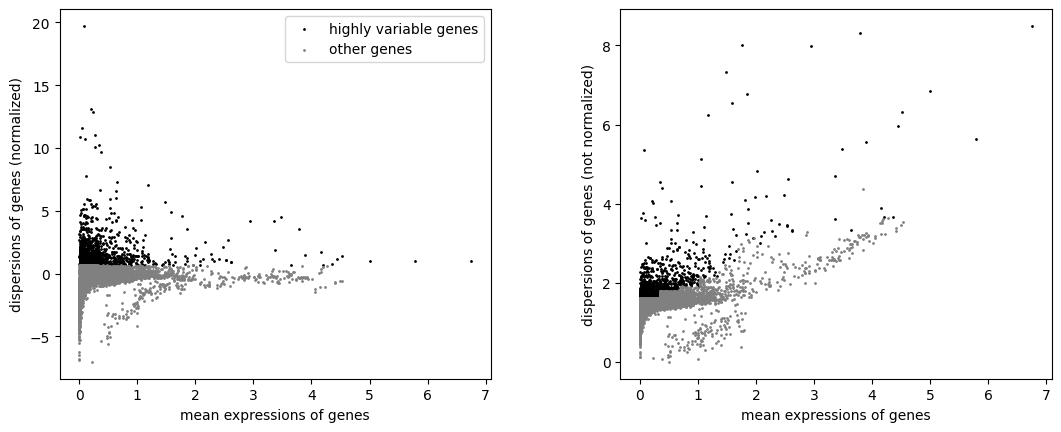

In [38]:
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, n_top_genes =2000, min_mean=0.0125, max_mean=9, min_disp=0.5)
sc.pl.highly_variable_genes(adata)


In [39]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


# Scanpy embeddings

In [40]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=50)
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=50)
sc.tl.umap(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:36)


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

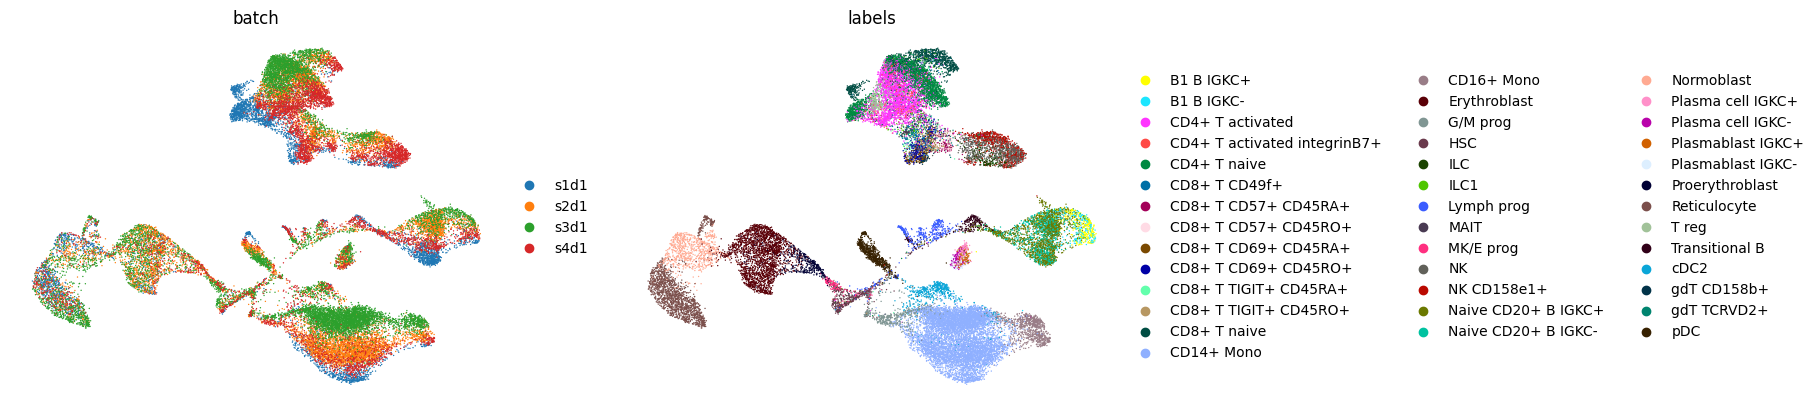

In [41]:
sc.pl.umap(adata, color=['batch', 'labels'], frameon=False)

# Harmony Integration

In [28]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=50)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:10)


In [29]:
# Batch correction with Harmony
sc.external.pp.harmony_integrate(adata, 'batch')

2024-05-13 14:58:48,027 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-13 14:58:54,578 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-13 14:58:54,685 - harmonypy - INFO - Iteration 1 of 10
2024-05-13 14:59:01,086 - harmonypy - INFO - Iteration 2 of 10
2024-05-13 14:59:07,545 - harmonypy - INFO - Iteration 3 of 10
2024-05-13 14:59:13,647 - harmonypy - INFO - Iteration 4 of 10
2024-05-13 14:59:17,779 - harmonypy - INFO - Iteration 5 of 10
2024-05-13 14:59:21,044 - harmonypy - INFO - Iteration 6 of 10
2024-05-13 14:59:23,168 - harmonypy - INFO - Iteration 7 of 10
2024-05-13 14:59:25,303 - harmonypy - INFO - Iteration 8 of 10
2024-05-13 14:59:27,427 - harmonypy - INFO - Iteration 9 of 10
2024-05-13 14:59:29,541 - harmonypy - INFO - Iteration 10 of 10
2024-05-13 14:59:31,668 - harmonypy - INFO - Converged after 10 iterations


In [30]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony', n_neighbors=50, n_pcs=50)
sc.tl.umap(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:41)


In [91]:
import numpy as np

unique_elements, counts = np.unique(adata.obs['labels'], return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}:  {count}")

B1 B IGKC+:  328
B1 B IGKC-:  239
CD14+ Mono:  7244
CD16+ Mono:  865
CD4+ T activated:  2464
CD4+ T activated integrinB7+:  417
CD4+ T naive:  2738
CD8+ T CD49f+:  291
CD8+ T CD57+ CD45RA+:  116
CD8+ T CD57+ CD45RO+:  119
CD8+ T CD69+ CD45RA+:  278
CD8+ T CD69+ CD45RO+:  296
CD8+ T TIGIT+ CD45RA+:  109
CD8+ T TIGIT+ CD45RO+:  267
CD8+ T naive:  1069
Erythroblast:  2202
G/M prog:  517
HSC:  455
ILC:  151
ILC1:  114
Lymph prog:  449
MAIT:  125
MK/E prog:  169
NK:  971
NK CD158e1+:  676
Naive CD20+ B IGKC+:  1663
Naive CD20+ B IGKC-:  945
Normoblast:  774
Plasma cell IGKC+:  137
Plasma cell IGKC-:  132
Plasmablast IGKC+:  121
Plasmablast IGKC-:  74
Proerythroblast:  435
Reticulocyte:  1656
T reg:  429
Transitional B:  274
cDC2:  546
gdT CD158b+:  37
gdT TCRVD2+:  81
pDC:  696


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

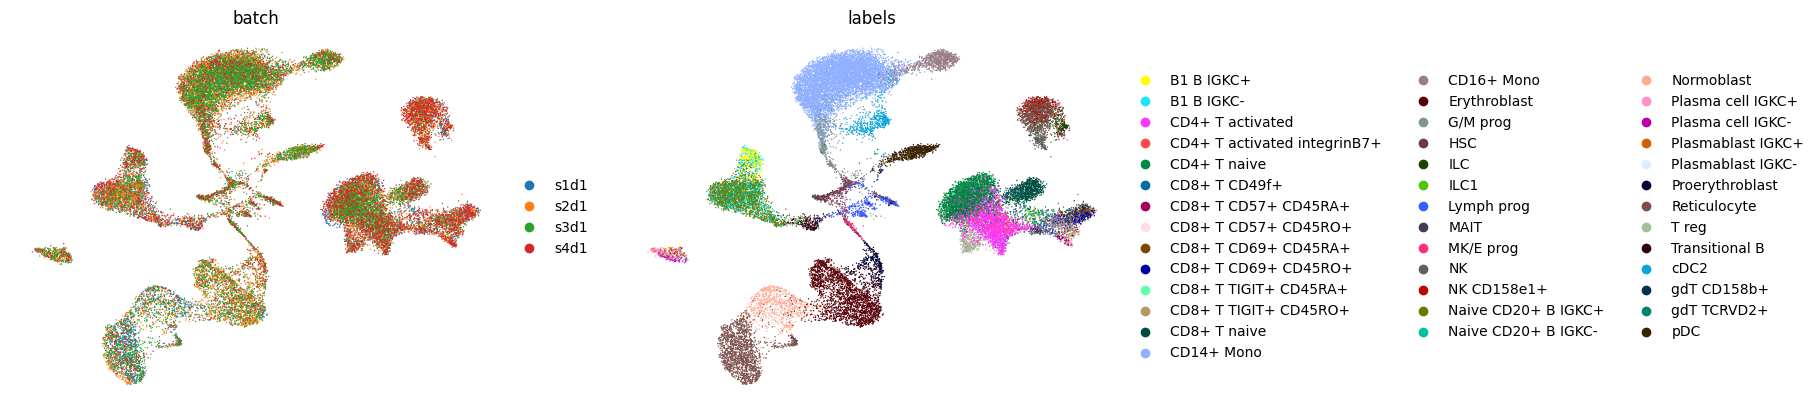

In [31]:
sc.pl.umap(adata, color=['batch', 'labels'], frameon=False)

/scratch/7172099.1.v100/ipykernel_347269/4106788277.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
/scratch/7172099.1.v100/ipykernel_347269/4106788277.py:3: SettingWithCopyWarn

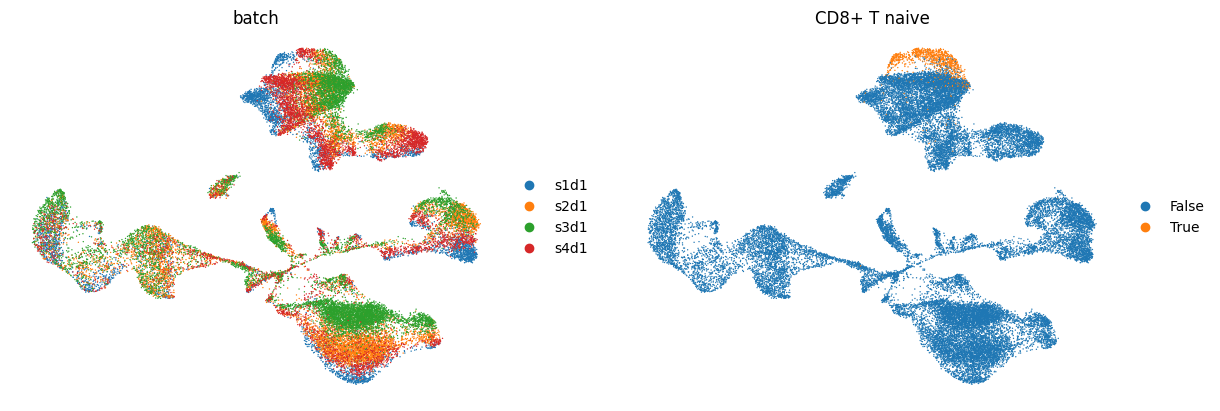

In [86]:
cell_type = 'CD8+ T naive'
adata.obs[cell_type] = 'False'
adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
sc.pl.umap(adata, color=['batch', cell_type], frameon=False)

/scratch/7172099.1.v100/ipykernel_347269/4257950309.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
/scratch/7172099.1.v100/ipykernel_347269/4257950309.py:3: SettingWithCopyWarn

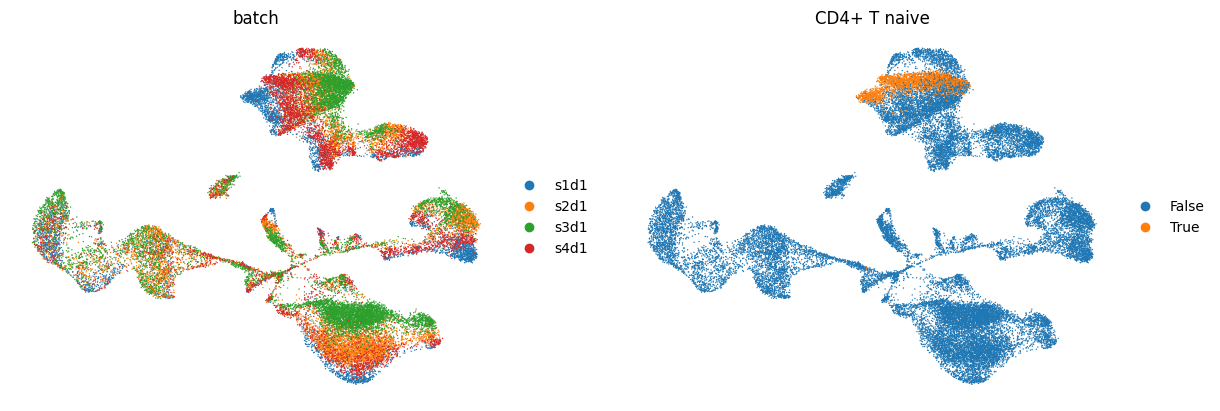

In [88]:
cell_type = 'CD4+ T naive'
adata.obs[cell_type] = 'False'
adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
sc.pl.umap(adata, color=['batch', cell_type], frameon=False)

/scratch/7172099.1.v100/ipykernel_347269/3711711508.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
/scratch/7172099.1.v100/ipykernel_347269/3711711508.py:3: SettingWithCopyWarn

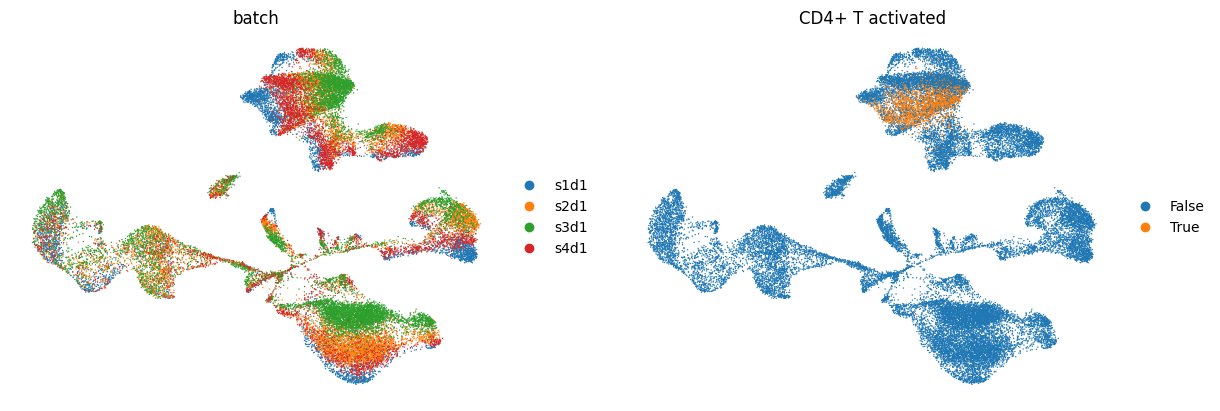

In [89]:
cell_type = 'CD4+ T activated'
adata.obs[cell_type] = 'False'
adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
sc.pl.umap(adata, color=['batch', cell_type], frameon=False)

/scratch/7172099.1.v100/ipykernel_347269/2304077904.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
/scratch/7172099.1.v100/ipykernel_347269/2304077904.py:3: SettingWithCopyWarn

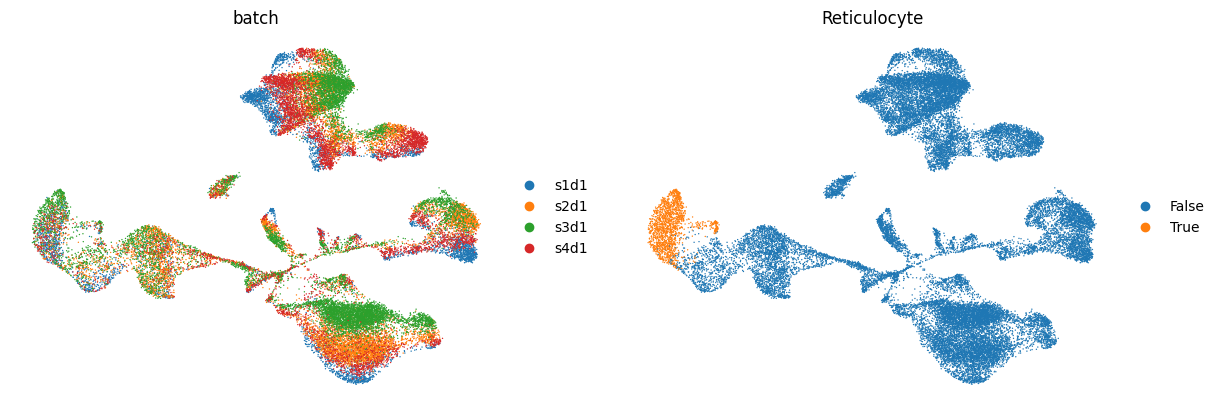

In [92]:
cell_type = 'Reticulocyte'
adata.obs[cell_type] = 'False'
adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
sc.pl.umap(adata, color=['batch', cell_type], frameon=False)

/scratch/7172099.1.v100/ipykernel_347269/1460748161.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
/scratch/7172099.1.v100/ipykernel_347269/1460748161.py:3: SettingWithCopyWarn

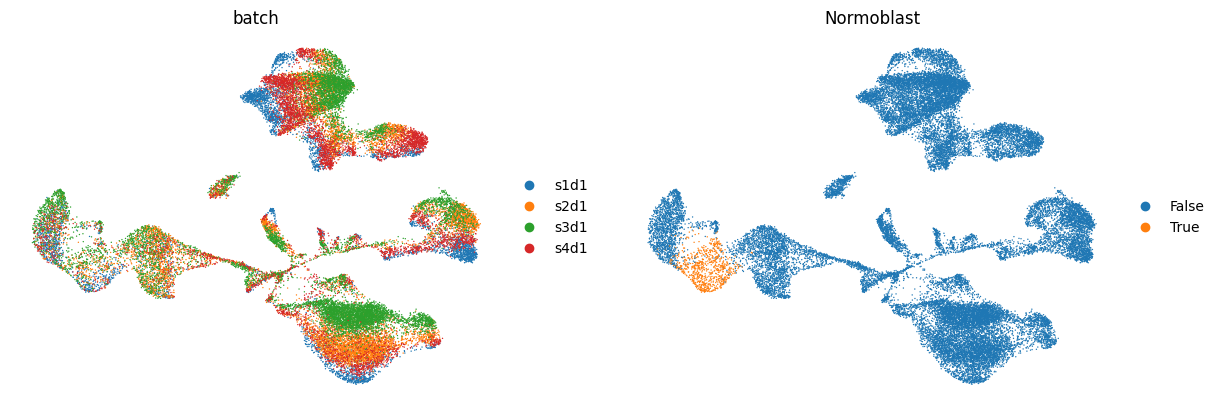

In [93]:
cell_type = 'Normoblast'
adata.obs[cell_type] = 'False'
adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
sc.pl.umap(adata, color=['batch', cell_type], frameon=False)

/scratch/7172099.1.v100/ipykernel_347269/2626493014.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
/scratch/7172099.1.v100/ipykernel_347269/2626493014.py:3: SettingWithCopyWarn

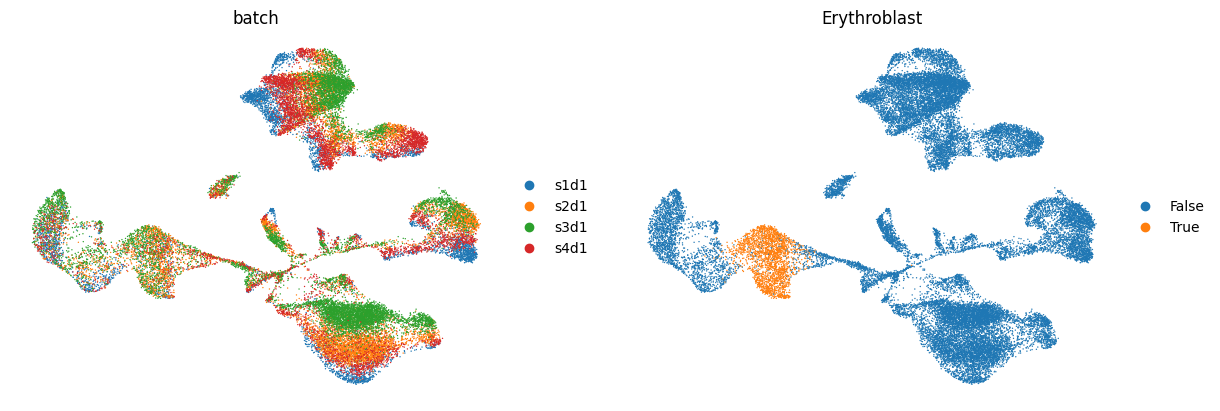

In [94]:
cell_type = 'Erythroblast'
adata.obs[cell_type] = 'False'
adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
sc.pl.umap(adata, color=['batch', cell_type], frameon=False)

In [ ]:
cell_type = ['CD4+ T activated', 'Erythroblast']

/scratch/7328370.1.iris-gpu-pub/ipykernel_974751/4225762755.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs['remove'][adata.obs['labels']=='CD4+ T activated']='CD4+ T activated'
/scratch/7328370.1.iris-gpu-pub/ipykernel_974751/

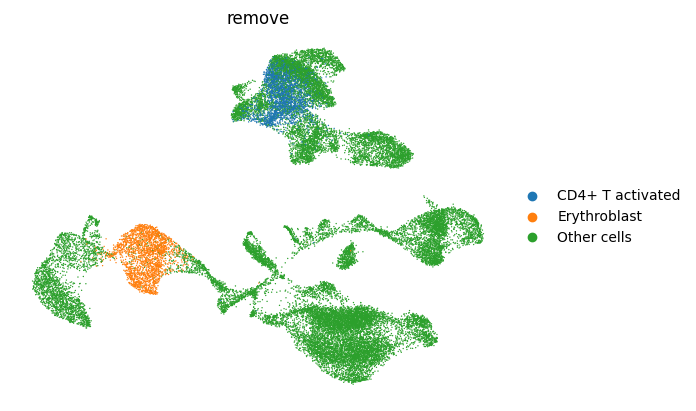

In [42]:
adata.obs['remove'] = 'Other cells'
adata.obs['remove'][adata.obs['labels']=='CD4+ T activated']='CD4+ T activated'
adata.obs['remove'][adata.obs['labels']=='Erythroblast']='Erythroblast'
sc.pl.umap(adata, color=['remove'], frameon=False)